In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

Through our previosuly shown method of webscrapping from the CoinDesk api, I have succefuly extracted the cryotocurrency price data for various cryptocurrencies and have combined them all to a single csv file for convenience. Since the webscrapping process takes a long time for completion i have not included that in the previous  ipynb file

In [ ]:
df=pd.read_csv('MergedData.csv')
print(df)

       Unnamed: 0  Name Symbol        Date       High        Low       Open  \
0               0  Aave   AAVE  2020-10-05  55.112358  49.787900  52.675035   
1               1  Aave   AAVE  2020-10-06  53.402270  40.734578  53.291969   
2               2  Aave   AAVE  2020-10-07  42.408314  35.970690  42.399947   
3               3  Aave   AAVE  2020-10-08  44.902511  36.696057  39.885262   
4               4  Aave   AAVE  2020-10-09  47.569533  43.291776  43.764463   
...           ...   ...    ...         ...        ...        ...        ...   
37077       37077   XRP    XRP  2021-07-02   0.667287   0.634726   0.659890   
37078       37078   XRP    XRP  2021-07-03   0.683677   0.644653   0.655639   
37079       37079   XRP    XRP  2021-07-04   0.707783   0.665802   0.673218   
37080       37080   XRP    XRP  2021-07-05   0.695653   0.648492   0.695653   
37081       37081   XRP    XRP  2021-07-06   0.679923   0.652676   0.653055   

           Close        Volume     Marketcap  
0   

Converting to date-time format

In [ ]:
df['Date']=pd.to_datetime(df['Date']).dt.date

Finding the top 5 cryptocurrencies based on Market Cap

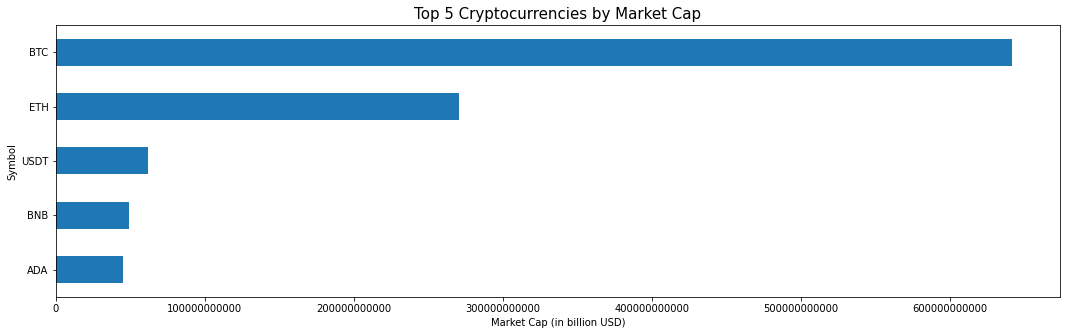

In [ ]:
plt.figure(figsize=(18,5))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()


**Observation**:
 Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it. and all other are very less in comparison to it and USDT is 3 times less then the Etherum

 Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap

In [ ]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index

data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]

In [ ]:
data_top_4_currencies

,Unnamed: 0,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
275,275,Binance Coin,BNB,2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
276,276,Binance Coin,BNB,2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
277,277,Binance Coin,BNB,2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
278,278,Binance Coin,BNB,2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
279,279,Binance Coin,BNB,2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
30610,30610,Tether,USDT,2021-07-02,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10
30611,30611,Tether,USDT,2021-07-03,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10
30612,30612,Tether,USDT,2021-07-04,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10
30613,30613,Tether,USDT,2021-07-05,1.001040,0.999426,0.999426,1.000667,4.721585e+10,6.241550e+10


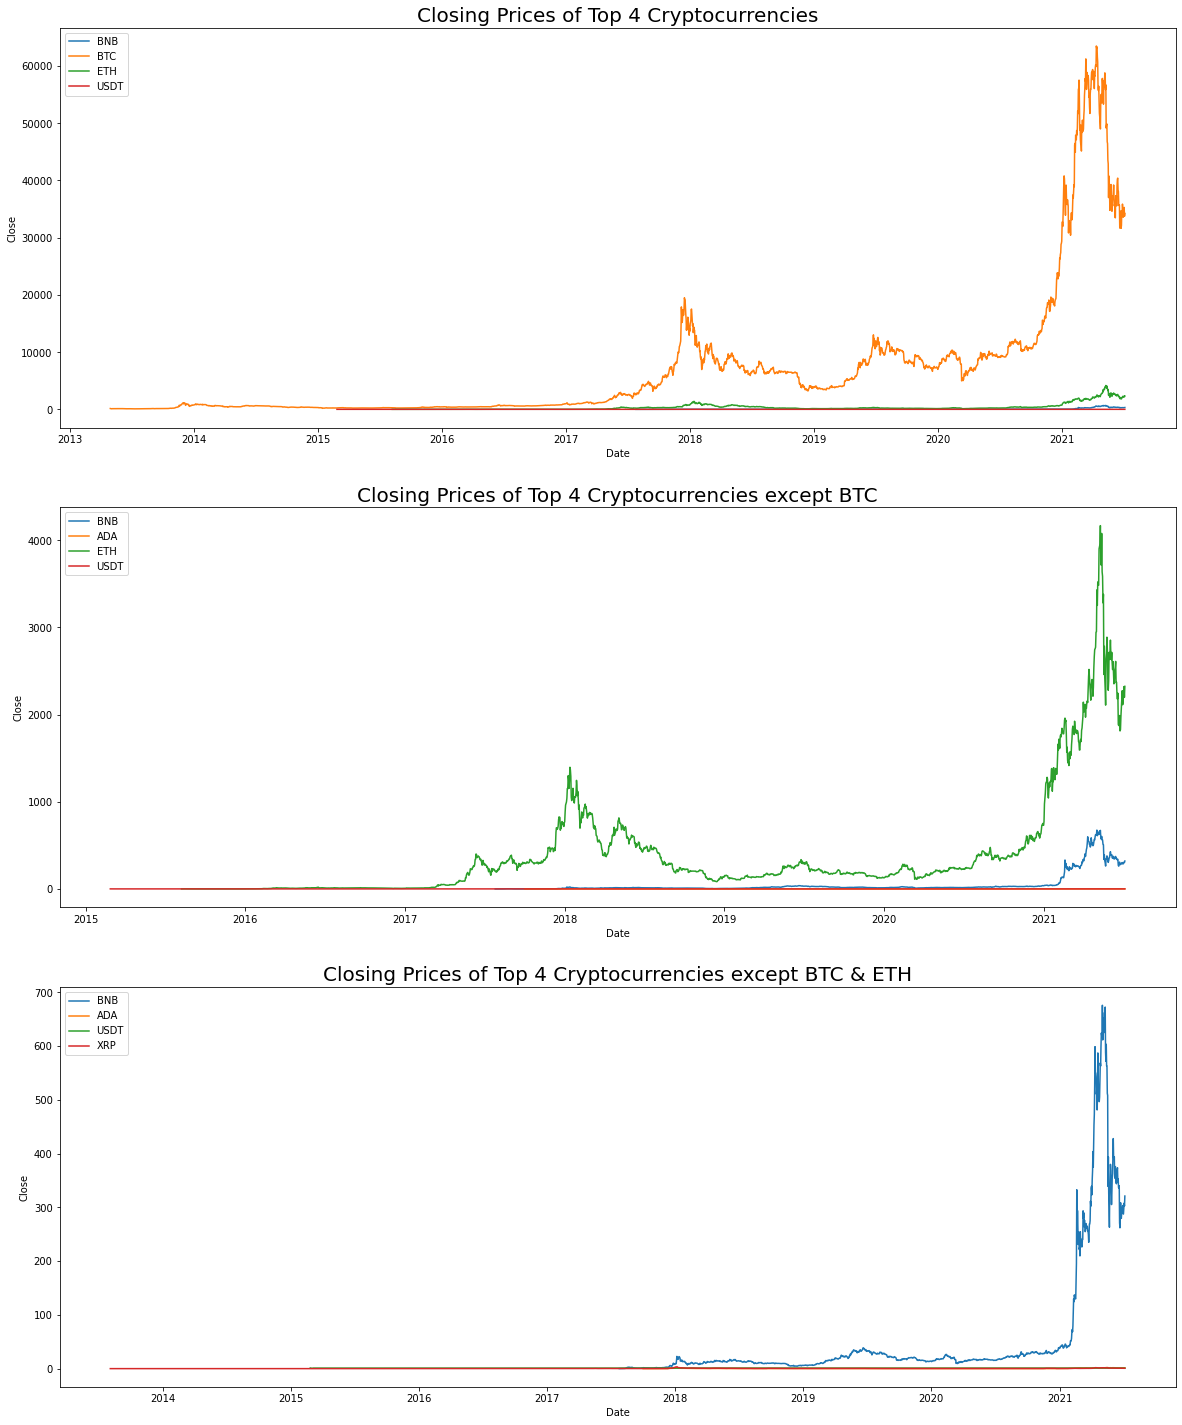

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(3,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(3,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(3,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')

 Observation:
 In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

 Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

 So from the above graphs we observe that Bitcoin and Ethereum are very big cryptocurrency with large market caps as well as much higher prices so comparing the closing prices may not be the best method for analysing other cryptocurrencies and a much better way for that would be to compare the daily returns or the correlation of prices of the coins with Bitcoin(which acts as the standard for the crypto market)

 In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.We find out the moving average for the top cryptocurrency by using to different rolling windows in order to determine the trend direction of securities

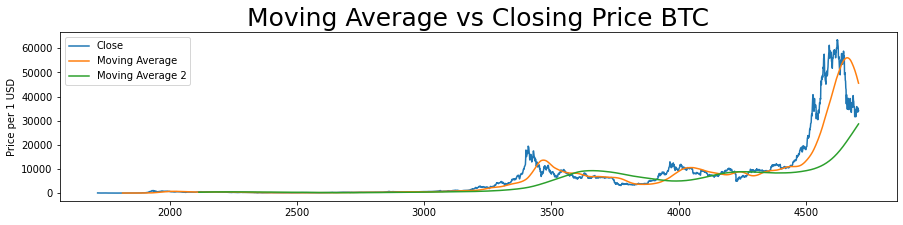

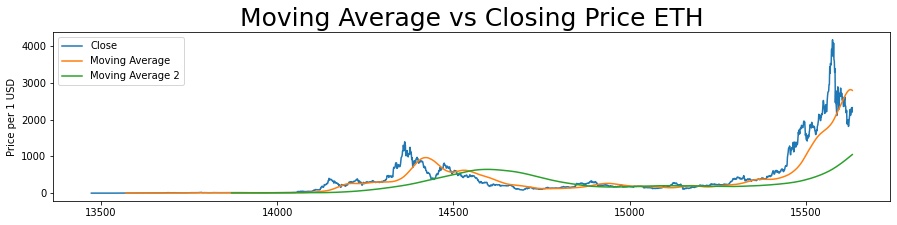

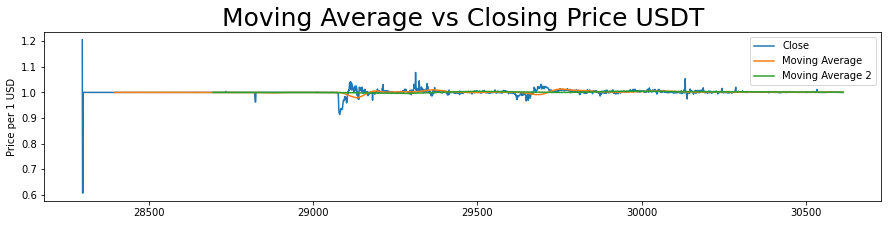

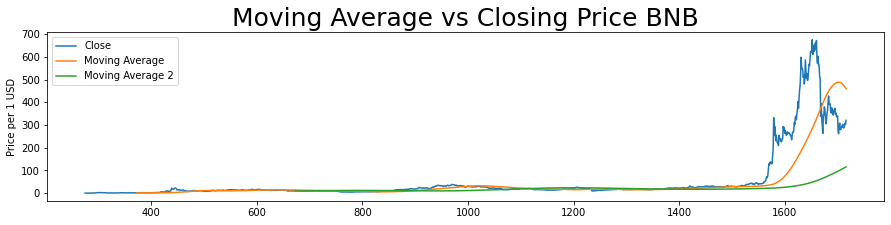

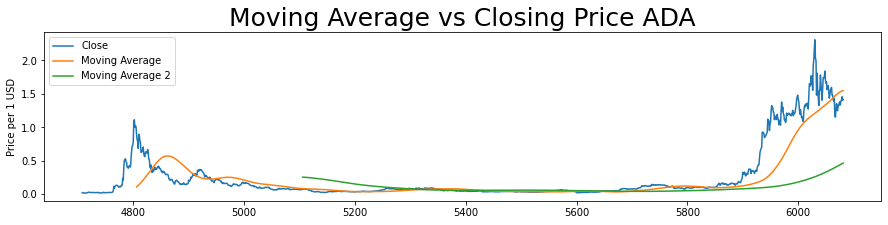

In [ ]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

In BTC and ETH

They have shown a pattern of 2 golden cross and 2 death cross over the years. The last crossing point of moving averages was golden cross hence it was bullish.

In USDT

There are too many golden cross and death cross. Hence it is a volatile coin and should be avoided for the time being.

Calculating multiple coins daily returnover the whole time period

In [ ]:
closing_prices=df['Close']

In [ ]:
closing_prices

0        53.219243
1        42.401599
2        40.083976
3        43.764463
4        46.817744
           ...    
37077     0.656763
37078     0.672888
37079     0.694945
37080     0.654300
37081     0.665402
Name: Close, Length: 37082, dtype: float64

In [ ]:
daily_return=closing_prices.copy()

In [ ]:
for j in range(1, len(closing_prices)):

  # Calculate the percentage of change from the previous day
  daily_return[j] = ((closing_prices[j]- closing_prices[j-1])/closing_prices[j-1]) * 100

# put zero in the first line item
daily_return[0] = 0
daily_return

0         0.000000
1       -20.326566
2        -5.465886
3         9.181942
4         6.976622
           ...    
37077    -0.668096
37078     2.455268
37079     3.277996
37080    -5.848669
37081     1.696791
Name: Close, Length: 37082, dtype: float64

Inserting the daily returns column to our pre-existing dataset

```



In [ ]:
df.insert(10,'Daily Returns',daily_return)

Comparing the daily returns of the top-5 coins

In [ ]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index

data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]

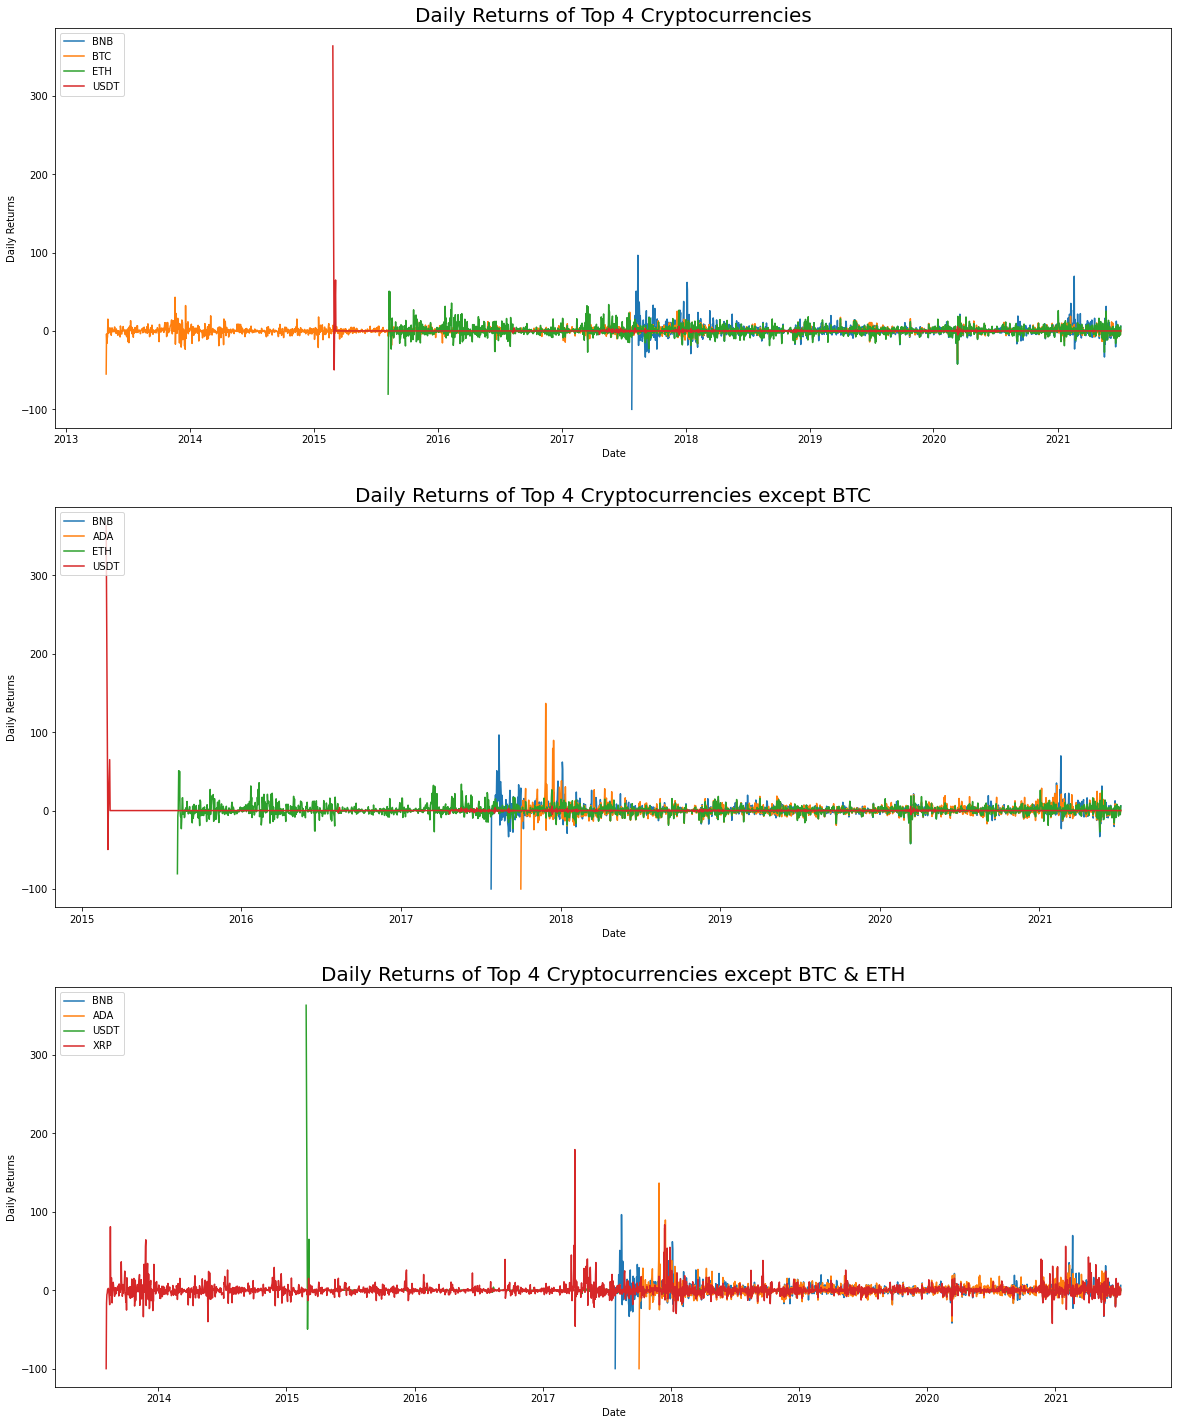

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(3,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Daily Returns", hue='Symbol')
plt.title("Daily Returns of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(3,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Daily Returns", hue='Symbol')
plt.title("Daily Returns of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(3,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Daily Returns", hue='Symbol')
plt.title("Daily Returns of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')

Through these plots we can observe that the volatility of BTC and ETH is very low as their daily returns plots have very less spikes compared to other lower coins like USDT and ADA meaning they are high risk high reward *investments*

Conclusion:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In BTC and ETH --They have shown a pattern of 2 golden cross and 2 death cross over the years. The last crossing point of moving averages was golden cross hence it was bullish.

In USDT -- There are too many golden cross and death cross. Hence it is a volatile stock and should be avoided for the time being.New Section

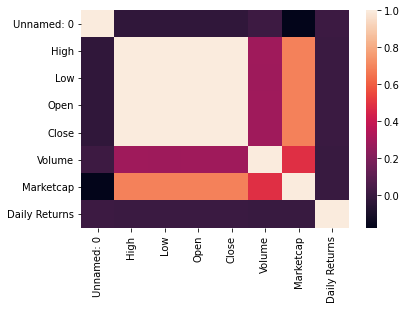

In [ ]:
df.corr()
sns.heatmap(df.corr())

From the correlation matrix we can infer that the daily returns/losses are inversely related to the size of market cap and hence coins with low market caps are  subject to more changes hence more returns

# CONCLUSION


Through this Exploratory Data Analysis work, we have derived a lot of insights from the web scrapped data obtained previously. These insights can be later used for a variety of purposes. Other than this, some other insights can also be drawn from the data like price trends, peak prices and the difference between current and peak price and so on. It really depends on the purpose  of use. 